In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

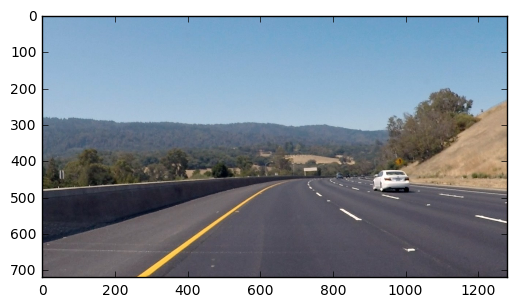

In [16]:
img = mpimg.imread("./curved-lane.jpg")
plt.imshow(img);

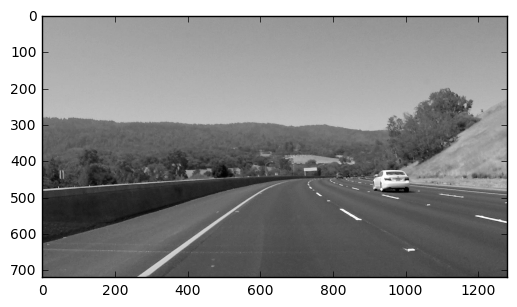

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

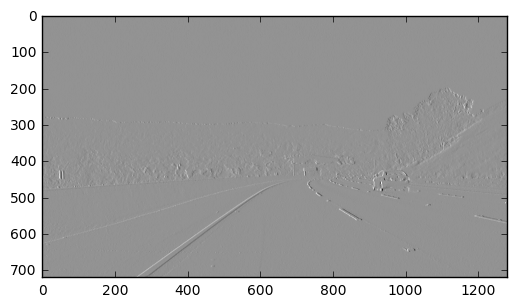

In [18]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
plt.imshow(sobelx, cmap="gray")

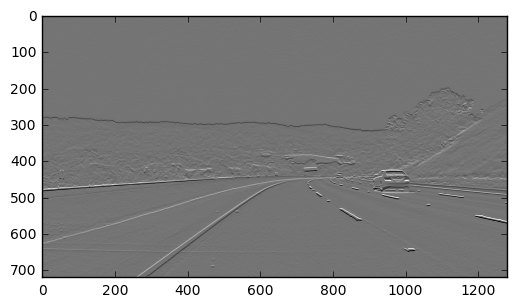

In [19]:
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
plt.imshow(sobely, cmap="gray")

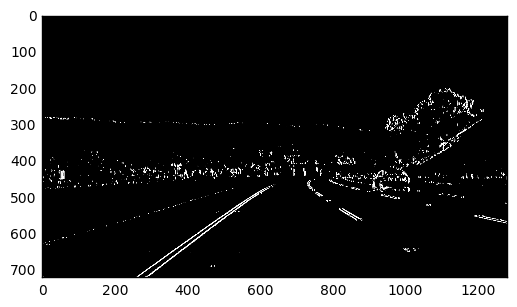

In [20]:
abs_sobelx = np.absolute(sobelx)
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

In [29]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if(orient == 'x'):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif(orient=='y'):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    elif(orient=="both"):
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
        sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
        
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255 * abs_sobel/np.max(abs_sobel))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    masked_sobel = np.zeros_like(scaled_sobel)
    masked_sobel[(scaled_sobel > thresh_min) & (scaled_sobel < thresh_max)] = 1
        
    # 6) Return this mask as your binary_output image
    return masked_sobel

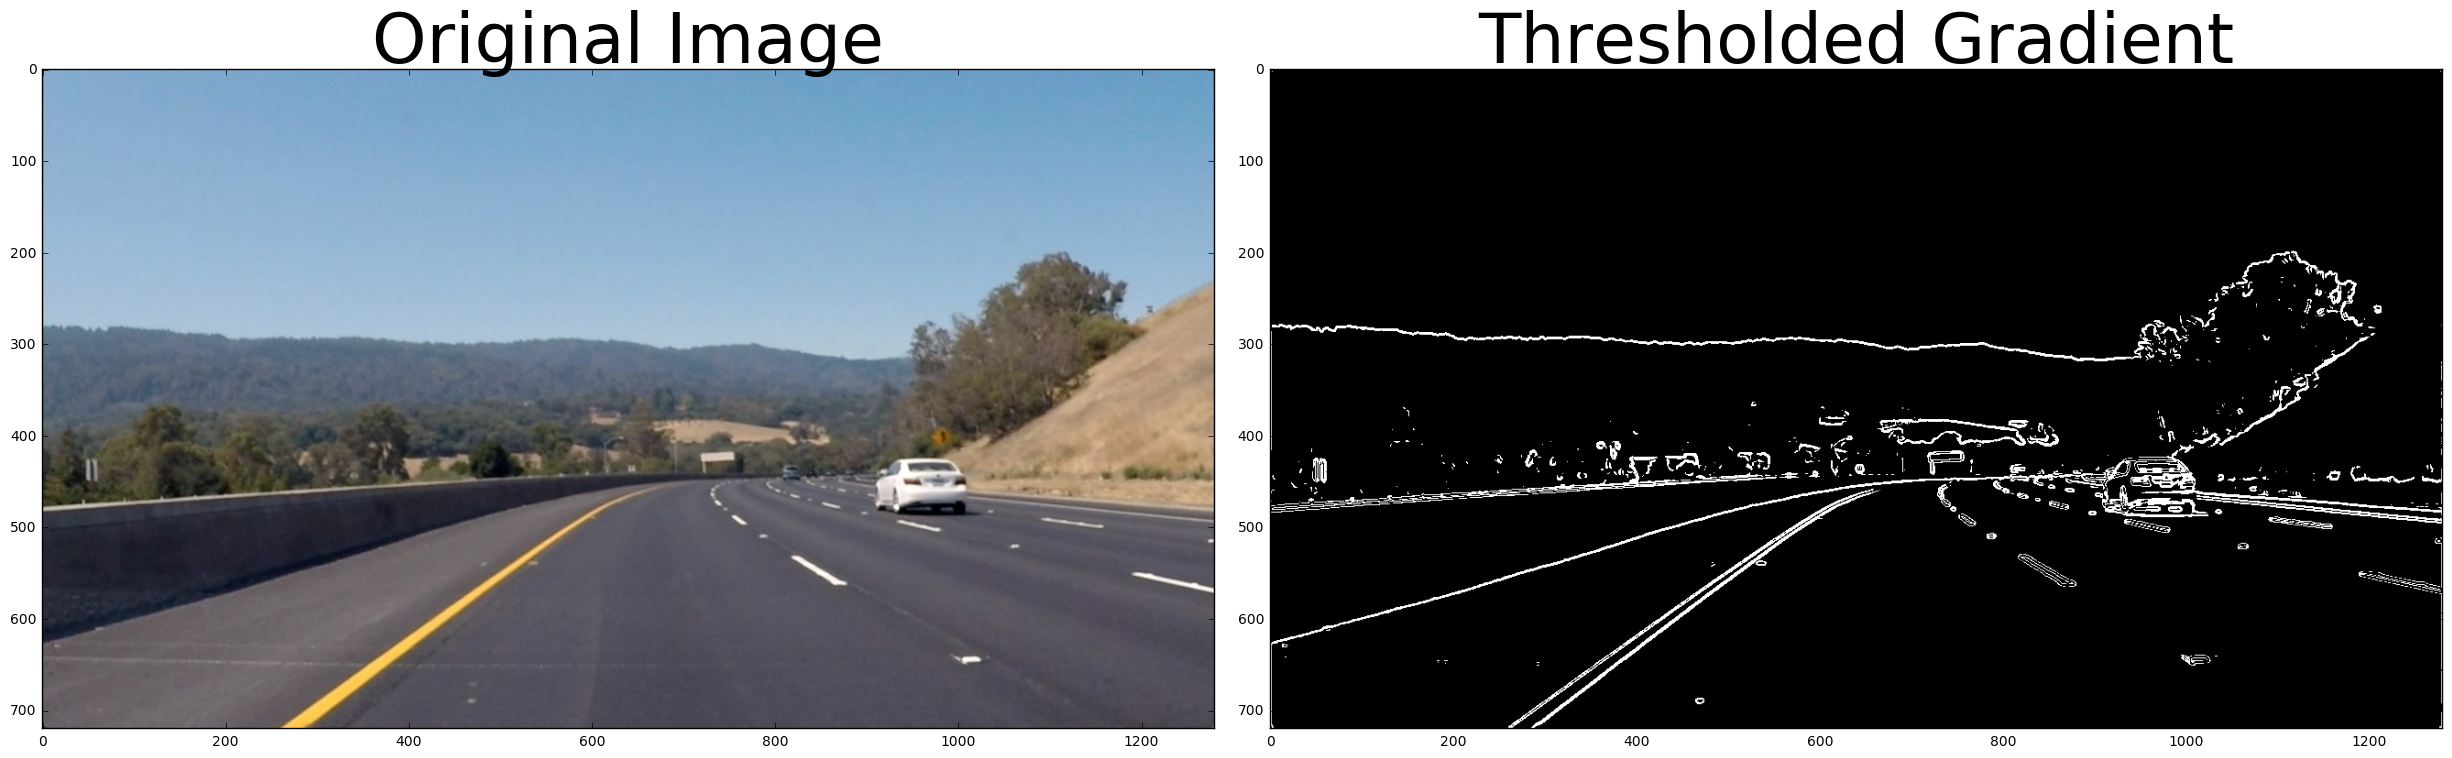

In [31]:
image = mpimg.imread("./curved-lane.jpg")
# Run the function
grad_binary = abs_sobel_thresh(image, orient='both', thresh_min=30, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [55]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    sobelx = np.absolute(sobelx)
    sobely = np.absolute(sobely)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction = np.arctan2(sobely, sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    masked_image = np.zeros_like(gray)
    masked_image[(direction > thresh[0]) & (direction < thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    return masked_image


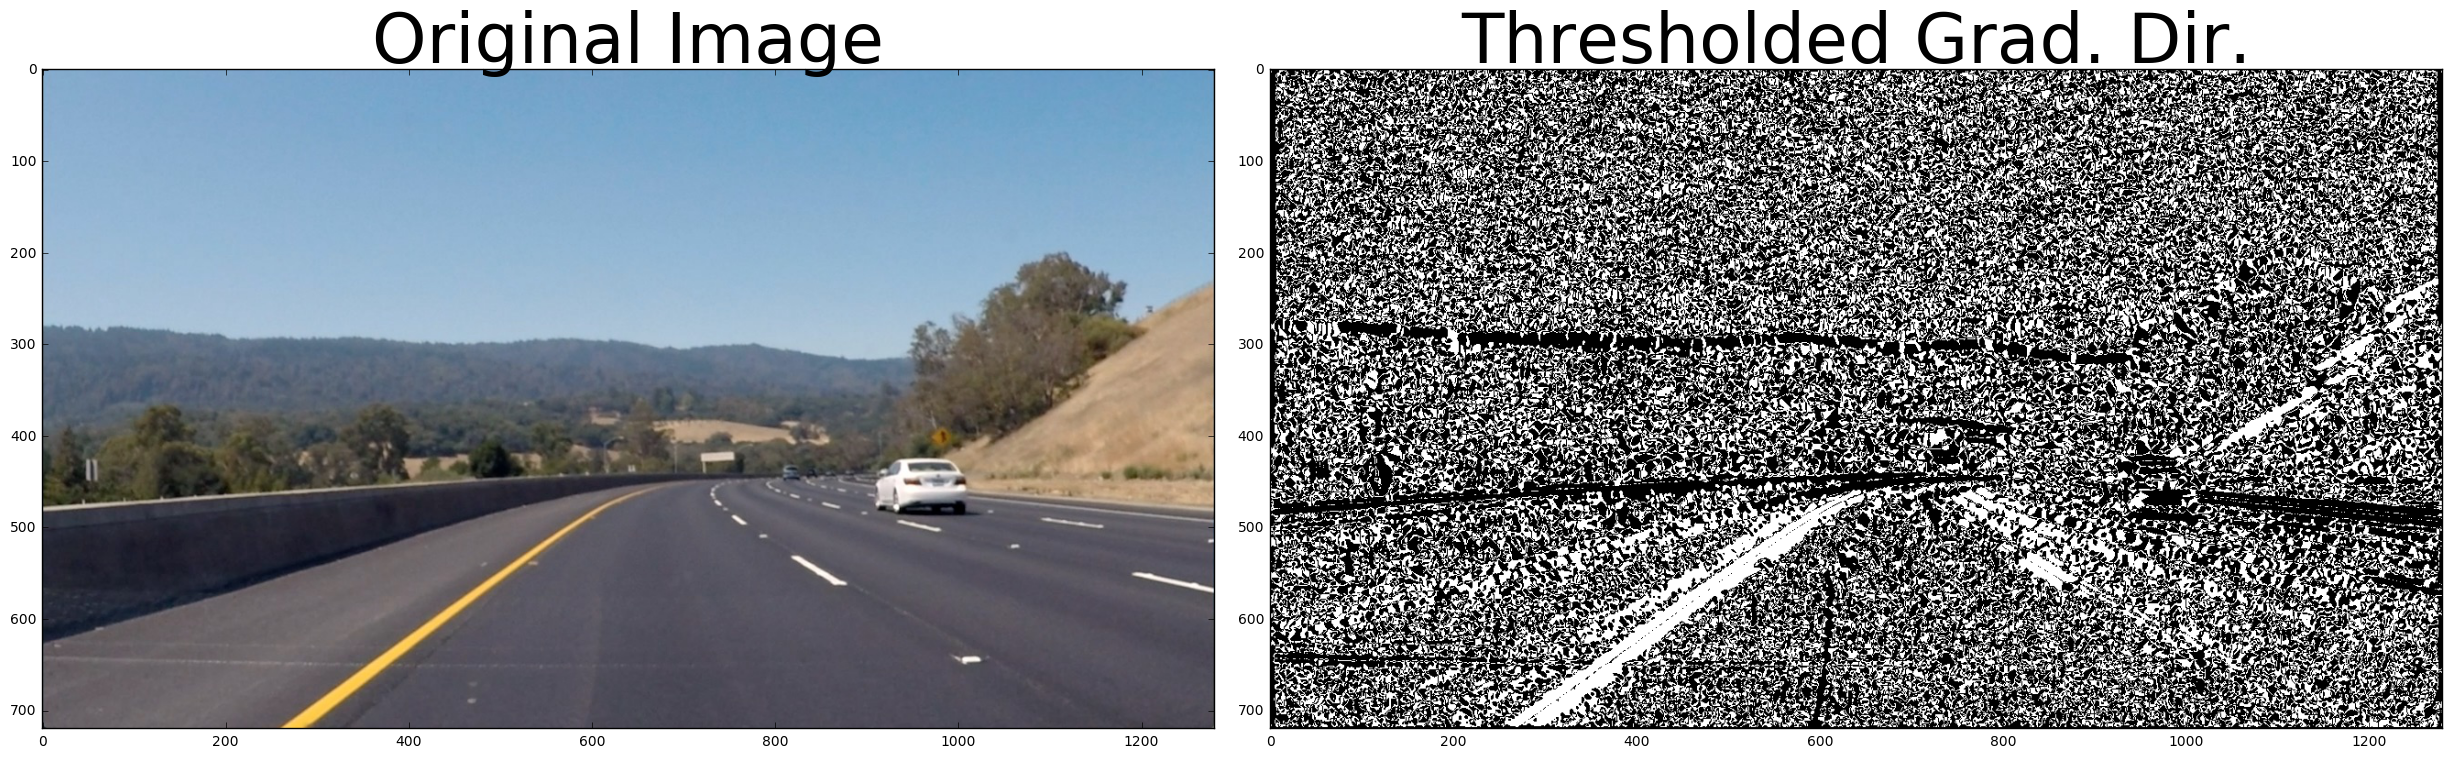

In [56]:
image = mpimg.imread('./curved-lane.jpg')
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Combining Thresholds

In [84]:
ksize=5

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = abs_sobel_thresh(image, orient="both", sobel_kernel=ksize, thresh=(0, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))

In [93]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) & ((mag_binary == 1) & (dir_binary == 1))] = 1

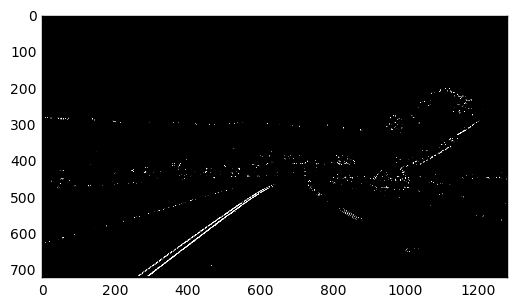

In [94]:
plt.imshow(combined, cmap="gray")